### Лабораторная работа №4 "Кластеризация K-means"

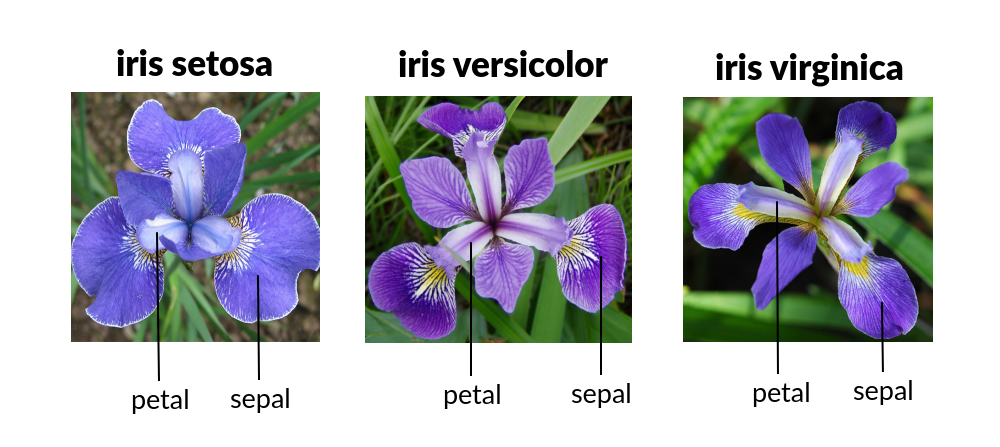

In [18]:
# Загрузка датасета с параметрами ирисов
from sklearn import datasets
from sklearn.metrics import accuracy_score

dataset = datasets.load_iris(return_X_y=False, as_frame=True)
labels = dataset['target_names']
dataset_df = dataset['data']
target = dataset['target']
display(labels)
display(target)
display(dataset_df)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Генератор списков
colors = ["Red", "Green", "Blue"]
colors_indices = [0, 1, 1, 0, 2, 0, 1, 0, 2]
colors_list = [colors[i] for i in colors_indices]

print(colors_list)

In [ ]:
#Необходимо добваить в DataFrame слолбец target и label


display(dataset_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# Расчет количества элементов

df = pd.DataFrame({"colors_indices": colors_indices, "colors_list": colors_list})

color = "Green"

print(df, '\n')
print(f"Number of {color} elements: {(df['colors_list'] == color).sum()}")

In [ ]:
# Расчет среднего отдельных элементов столбца

df["feature"] = np.random.randn(len(df["colors_list"]))
color = "Red"

print(df, '\n')
ind = (df["colors_list"] == color).to_numpy()
print(f"Mean of {df.columns[2]} for {color}: {df.iloc[ind, 2].mean():.4}")

In [ ]:
# Необходимо подсчитать количество примеров каждого класса

for i in range(dataset_df.target.max() + 1):
    print(f'Number of {labels[i]} examples {None}')

print('\n')

# Необходимо подсчитать количество примеров каждого класса

for i in range(len(labels)):
    for j in range(4):
        #ind = ?
        print(f'Mean value of {"название признака"} for {labels[i]} - {"среднее значение"}')
    print()

Number of setosa examples None
Number of versicolor examples None
Number of virginica examples None


Mean value of название признака for setosa - среднее значение
Mean value of название признака for setosa - среднее значение
Mean value of название признака for setosa - среднее значение
Mean value of название признака for setosa - среднее значение

Mean value of название признака for versicolor - среднее значение
Mean value of название признака for versicolor - среднее значение
Mean value of название признака for versicolor - среднее значение
Mean value of название признака for versicolor - среднее значение

Mean value of название признака for virginica - среднее значение
Mean value of название признака for virginica - среднее значение
Mean value of название признака for virginica - среднее значение
Mean value of название признака for virginica - среднее значение



# Алгоритм кластеризации K-means

_Кластерный анализ – многомерная статистическая процедура, которая способна формировать группы таким образом, чтобы члены группы были наиболее похожими друг на друга и не похожи на членов других групп. Сформированные группы называют кластерами. Одним из наиболее распространенных методов кластерного анализа является метод __К-средних__. Данный метод позволяет для m примеров выделить __k__ кластеров, при __m > k__. Тогда для входного набора данных __X размером (n, m)__ будет поставлен в соответствие вектор присвоенных индексов кластера __C размером (m)__, где n - количество примеров, m - количество признаков. Каждому кластеру поставлен в соответствие центроид из __µ размером (k, m)__, который является точкой в пространстве признаков. Принцип действия алгоритма заключается в минимизации суммарного квадратичного отклонения точек кластеров от центроидов этих кластеров:_
$$
    J = \frac{1}{n}\sum_{i}^n{||x_{i}-µ_{c}||^2}
$$
$$
    ||x_{i}-µ_{i, c}||^2 = \sqrt{\sum_{j}^m{(x_{i, j}-µ_{c, j})^2}}
$$
_c - индекс центроида i-го элемента_  
_Процесс обучения начинается со случайной инициализации, когда в качестве центроидов используются случайные точки из набора входных данных. От выбора начального положения центроидов зависит конечный результат выделения кластеров. Далее рассмотрен алгоритм в виде псевдокода:_

In [ ]:
# Инициализация центроидов  
# rand(1:k) - (случайные неповторяющиеся индексы от 1 до n)  
# for i=1:k  
#    μ(i) = X(rand(i))  
# dist(k, n) – Массив расстояний от точек до кластеров. dist[i, j] показывает расстояние от i-го центроида до j-ой точки.  
# clusters(1:n) – вектор индексов кластеров для каждого примера  
# Основной цикл обработки  
# for iteration=1:nax_iter  
#     Поиск расстояния от точек до центроида  
#     for i=1:k:  
#         dist[i] = вектор расстояний до точек от i-го центроида, имеющий размер n 
#     Присваивание номера кластера точкам  
#     for i=1:n:  
#         clusters[i] = индекс минимального элемента dist[i,:]  
#     Передвижение центроидов  
#     for i=1:k  
#         μ[i] = сумма координат точек i-го центроида / кол-во точек принадлежащих i-му центроиду  


In [ ]:
# Numpy broadcasting

df["feature 2"] = np.random.randn(len(df["colors_list"]))
print(df, '\n')

array = df.iloc[:, 2:].to_numpy()
point = array[0]
sub = array - point

print(f"array:\n{array}\n")
print(f"point:\n{point}\n")
print(f"sub:\n{sub}\n")

In [ ]:
# Поэлементные операции

print(f"sub:\n{sub}\n")
print(f"sub ** 2:\n{sub ** 2}\n")

In [ ]:
# Применение операций по отдельным осям

print(f"sub:\n{sub}\n")
print(f"sub.sum(axis=0):\n{sub.sum(axis=0)}\n")

print(f"sub:\n{sub}\n")
print(f"sub.argmin(axis=0):\n{sub.argmin(axis=0)}\n")

print(f"sub:\n{sub}\n")
print(f"sub.argmax(axis=1):\n{sub.argmax(axis=1)}\n")

In [ ]:
def trainKmeans(x, k: int=2, max_iter: int=100, eps: int=1e-6, centroids=None):
    """Производит кластеризацию методом К-средних.
    Возвращает массив с разметкой кластеров и центроиды"""
    n = x.shape[0]
    if centroids is None:
        indices = np.random.permutation(n) # Индексы в случайном порядке
        centroids = ? # Выбор центроидов
    clusters = np.zeros(n)
    dist = np.zeros((k, n))
    for iter in range(max_iter):
        # Поиск расстояния от точек до центроида
        for i in range(k):
            dist[i] = ?
        # Присваивание номера кластера точкам
        clusters = ?
        centroids_old = centroids.copy()
        #Передвижение центроидов
        for i in range(k):
            cluster_indices = clusters == i
            centroids[i] = x[cluster_indices].sum(axis=0) / sum(cluster_indices)
        #Если изменение незначительное останавливаем
        if (centroids - centroids_old).max() < eps:
            break
    
    return clusters, centroids

In [ ]:
# Применение K-means

clusters, centroids = trainKmeans(dataset_df.iloc[:, :4].to_numpy(), k=3)

print(f'accuracy {accuracy_score(dataset_df.target, clusters):.4}')

accuracy 0.9267


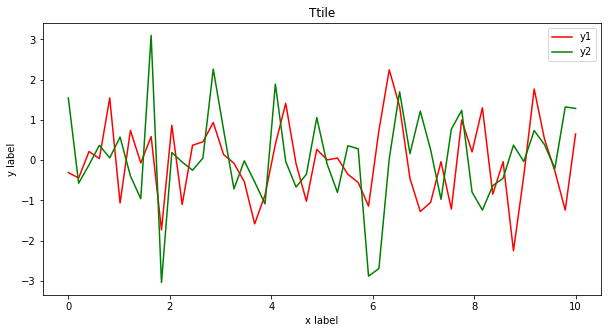

In [ ]:
# График кривой

from matplotlib import pyplot as plt

x = np.linspace(0, 10, 50)
y1 = np.random.randn(50)
y2 = np.random.randn(50)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, y1, c='r')
ax.plot(x, y2, c='g')
ax.set_title('Ttile')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.legend(['y1', 'y2'])
plt.show()

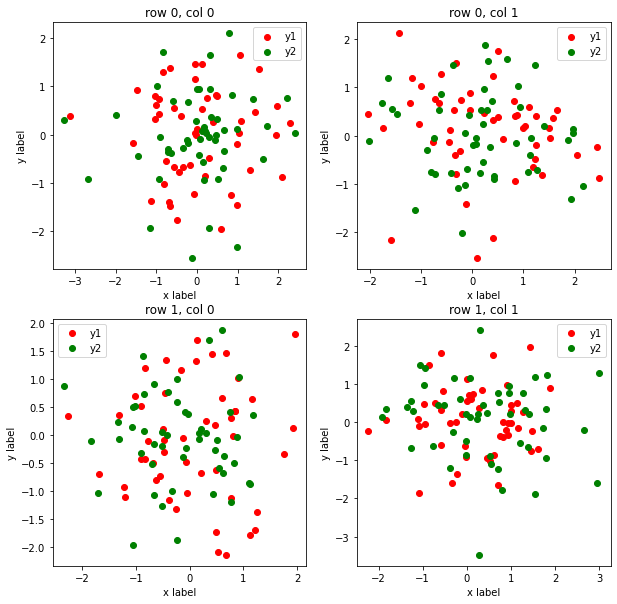

In [ ]:
# Вывод графиков разброса
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)

for i in range(2):
    for j in range(2):
        x_1 = np.random.randn(50)
        x_2 = np.random.randn(50)
        y_1 = np.random.randn(50)
        y_2 = np.random.randn(50)
        ax[i, j].scatter(x_1, y_1, c='r')
        ax[i, j].scatter(x_2, y_2, c='g')
        ax[i, j].set_title(f'row {i}, col {j}')
        ax[i, j].set_xlabel('x label')
        ax[i, j].set_ylabel('y label')
        ax[i, j].legend(['y1', 'y2'])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# left float, optional
# The position of the left edge of the subplots, as a fraction of the figure width.

# right float, optional
# The position of the right edge of the subplots, as a fraction of the figure width.

# bottom float, optional
# The position of the bottom edge of the subplots, as a fraction of the figure height.

# top float, optional
# The position of the top edge of the subplots, as a fraction of the figure height.

# wspace float, optional
# The width of the padding between subplots, as a fraction of the average Axes width.

# hspace float, optional
# The height of the padding between subplots, as a fraction of the average Axes height.

plt.show()

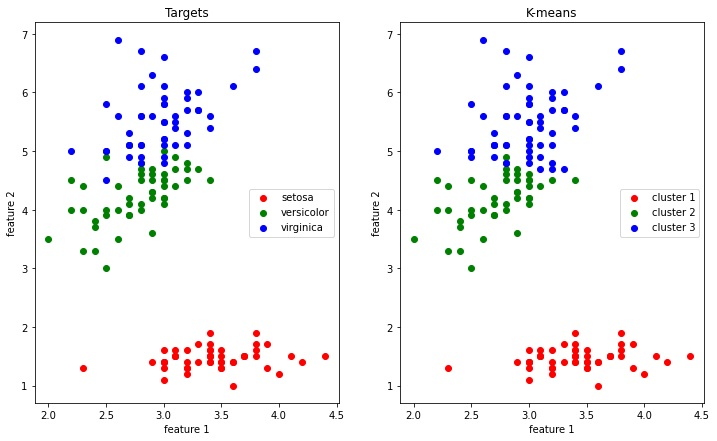

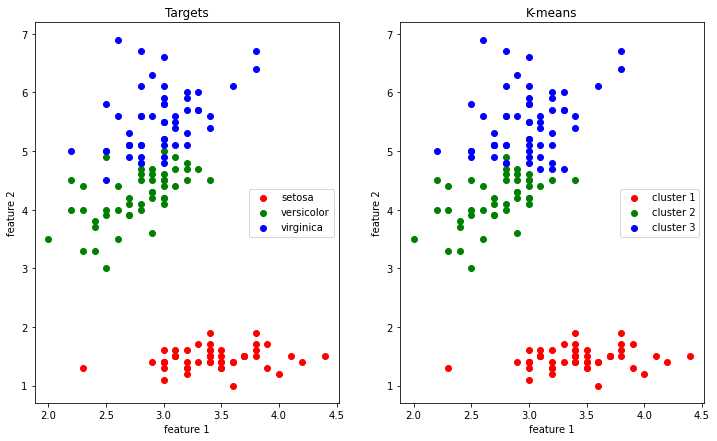

In [ ]:
# Для тестовых данных необходимо выполнить визуализацию по примеру в ячейке выше

feature1 = 1
feature2 = 2
colors = ['r', 'g', 'b']

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), ncols=2, nrows=1)

for i in range(3) :
    x_target = ?
    y_target = ?
    ax[0].scatter(x_target, y_target, c=colors[i])
    
    x_cluster = ?
    y_cluster = ?
    ax[1].scatter(x_cluster, y_cluster, c=colors[i])

ax[0].set_title(f'Targets')
ax[0].set_xlabel(f'feature {feature1}')
ax[0].set_ylabel(f'feature {feature2}')
ax[0].legend(labels)

ax[1].set_title(f'K-means')
ax[1].set_xlabel(f'feature {feature1}')
ax[1].set_ylabel(f'feature {feature2}')
ax[1].legend([?])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

_Дополнительные задание: проделать те же действия для этого датасета:  
Добавить в функцию обучения K-means вывод информации об отклонении, текущей итерации, количество элементов в кластерах и т.п  
Сделать визуализацию в трехмерном виде (нужно погуглить)